In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv(r"C:\Users\Welcome\Desktop\House Pricing\house_prices.csv")
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,N,0,Average,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,N,0,Average,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,N,0,Average,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,N,0,Very Good,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,N,0,Average,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,832500,4,4.00,3430,35102,2.0,N,0,Good,10,2390,1040,1986,0,98075,47.5822,-121.987,3240,35020
76,380000,4,1.75,1760,7300,1.0,N,0,Average,7,880,880,1956,0,98008,47.6034,-122.125,1680,7500
77,480000,3,1.00,1040,5060,1.0,N,0,Average,7,1040,0,1941,0,98116,47.5636,-122.394,890,5060
78,410000,3,1.00,1410,5060,1.0,N,0,Good,7,910,500,1956,0,98133,47.7073,-122.340,1130,5693


In [12]:
data.isnull().sum()
data = pd.get_dummies(data, drop_first=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,grade,sqft_above,sqft_basement,...,zipcode,lat,long,sqft_living15,sqft_lot15,waterfront_Y,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,221900,3,1.00,1180,5650,1.0,0,7,1180,0,...,98178,47.5112,-122.257,1340,5650,False,False,False,False,False
1,538000,3,2.25,2570,7242,2.0,0,7,2170,400,...,98125,47.7210,-122.319,1690,7639,False,False,False,False,False
2,180000,2,1.00,770,10000,1.0,0,6,770,0,...,98028,47.7379,-122.233,2720,8062,False,False,False,False,False
3,604000,4,3.00,1960,5000,1.0,0,7,1050,910,...,98136,47.5208,-122.393,1360,5000,False,False,False,False,True
4,510000,3,2.00,1680,8080,1.0,0,8,1680,0,...,98074,47.6168,-122.045,1800,7503,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,832500,4,4.00,3430,35102,2.0,0,10,2390,1040,...,98075,47.5822,-121.987,3240,35020,False,False,True,False,False
76,380000,4,1.75,1760,7300,1.0,0,7,880,880,...,98008,47.6034,-122.125,1680,7500,False,False,False,False,False
77,480000,3,1.00,1040,5060,1.0,0,7,1040,0,...,98116,47.5636,-122.394,890,5060,False,False,False,False,False
78,410000,3,1.00,1410,5060,1.0,0,7,910,500,...,98133,47.7073,-122.340,1130,5693,False,False,True,False,False


In [13]:
x = data.drop(['price'], axis = 1)
y = data['price']

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size =0.2,random_state = 0)

In [16]:
import sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain, ytrain)

LinearRegression()

In [18]:
ytrain_pred = lm.predict(xtrain)
ytest_pred = lm.predict(xtest)

In [19]:
df=pd.DataFrame(ytrain_pred,ytrain)
df=pd.DataFrame(ytest_pred,ytest)

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ytest, ytest_pred)
print(mse)
mse = mean_squared_error(ytrain_pred,ytrain)
mse

55937559853.2661


14566303643.224709

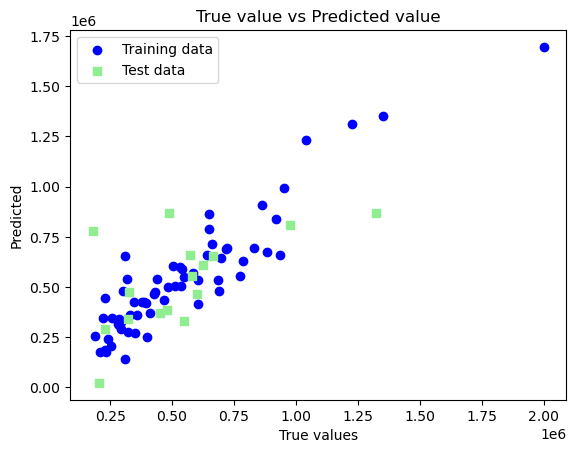

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(ytrain ,ytrain_pred,c='blue',marker='o',label='Training data')
plt.scatter(ytest,ytest_pred ,c='lightgreen',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot()
plt.show() 

In [22]:
x=np.array([95,85,80,70,60])
y=np.array([85,95,70,65,70])

model = np.polyfit(x, y, 1)
model

array([ 0.64383562, 26.78082192])

In [23]:
predict = np.poly1d(model)
predict(65)

68.63013698630137

In [24]:
y_pred= predict(x)
y_pred

array([87.94520548, 81.50684932, 78.28767123, 71.84931507, 65.4109589 ])

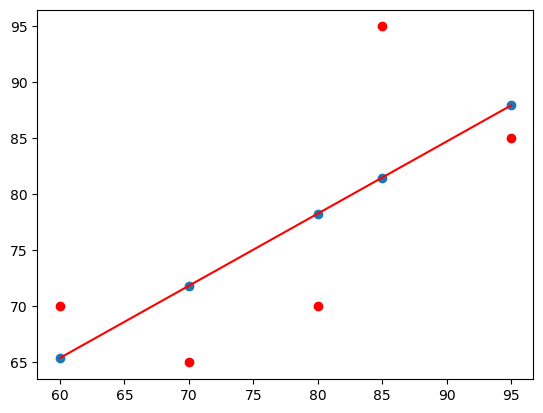

In [25]:
y_line = model[1] + model[0]* x
plt.plot(x,y_line, c= 'r')
plt.scatter(x,y_pred)
plt.scatter(x,y,c='r')